In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

(60000, 28, 28) (10000, 28, 28)


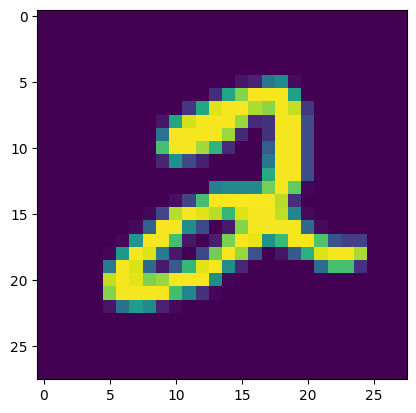

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,x_test.shape)
plt.imshow(x_train[5])
plt.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)  #28x28
print(x_train.shape,x_test.shape)
print(x_train[0])

(60000, 784) (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 

In [ ]:
print(y_train)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train)
print(x_train.max())
x_train=x_train/255
print(x_train.max())
print(x_test)
x_test=x_test/255
print(x_test)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
255
1.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3260 - loss: 2.0893 - val_accuracy: 0.7489 - val_loss: 1.3664
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 1.2773 - val_accuracy: 0.8160 - val_loss: 0.9956
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7948 - loss: 0.9894 - val_accuracy: 0.8377 - val_loss: 0.8218
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8189 - loss: 0.8356 - val_accuracy: 0.8494 - val_loss: 0.7219
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8317 - loss: 0.7446 - val_accuracy: 0.8595 - val_loss: 0.6563
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8444 - loss: 0.6854 - val_accuracy: 0.8653 - val_loss: 0.6102
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8481 - loss: 0.6395 - val_accuracy: 0.8683 - val_loss: 0.5755
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8545 - loss: 0.6071 - 

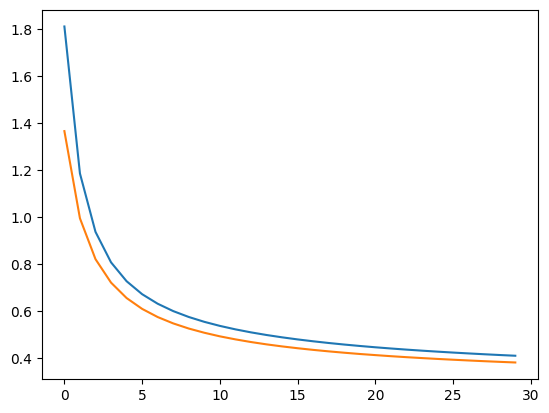

In [ ]:
model=Sequential()
model.add(Dense(10, input_dim=784, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
callbacks=ModelCheckpoint('my model.keras', monitor='val_loss', save_best_only=True,mode='min')
res=model.fit(x_train,y_train, epochs=30, batch_size=32,validation_split=0.2)
model.evaluate(x_test,y_test)
#plotting
plt.plot(res.history['loss'],label='training loss')
plt.plot(res.history['val_loss'],label='validation loss')
plt.show()